In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.ensemble import RandomForestClassifier
from scipy import sparse
from scipy.sparse import coo_matrix

#### Categorias do Documento  
Como explicado na documentação, os textos são divididos em algumas categorias. Para processar os dados, deve-se converter essas strings em números.  
É importante lembrar que antes de executar o programa deve-se descompactar o arquivo *rcv1rcv2aminigoutte.tar.gz* na pasta do projeto. Isso criará a pasta *rcv1rcv2aminigoutte*, que contém os arquivos necessários para o problema.

In [10]:
categories = {'C15': 4587, 'CCAT': 8745, 'E21': 9625, 'ECAT': 5656, 'GCAT': 8745, 'M11': 45845}

Esse método faz esse tratamento dos dados, substituindo as strings correspondentes as classes em seus respectivos números.

In [11]:
def filter_datas(file, target_file):
    with open(file, 'r') as document_read:
        with open(target_file, 'w') as document_write:
            for line in document_read:
                target = line.split(None, 1)[0]
                line_to_write = '%s %s' % (categories[target], line[len(target)+1:len(line)])
                document_write.write(line_to_write)
        
    return target_file

#### Carregando o dataset no formato SVMLight

In [12]:
file = filter_datas('rcv1rcv2aminigoutte/EN/Index_EN-EN', 'svml_en_en.txt')
x,  y = load_svmlight_file(file)

#### Selecionando variáveis importantes para a construção do modelo
Um dos benefícios do RandomForestClassifier é que se pode trabalhar com muitos dados e pode reduzir a dimensionalidade, pois ele identifica as variáveis mais importantes. 


In [13]:
model = RandomForestClassifier()
model.fit(x, y)

featimp = pd.Series(model.feature_importances_).sort_values(ascending=False)
print(featimp)

8        0.033306
7        0.014236
28       0.012603
96       0.012479
14       0.010081
59       0.009965
103      0.008336
131      0.007474
158      0.007407
165      0.007175
54       0.007132
312      0.005265
464      0.005166
230      0.005109
34       0.005031
80       0.005011
326      0.004990
57       0.004802
699      0.004800
0        0.004634
18       0.004359
84       0.004180
42       0.004010
270      0.003957
221      0.003840
4        0.003710
425      0.003699
280      0.003663
666      0.003634
934      0.003595
           ...   
11740    0.000000
11741    0.000000
11771    0.000000
11770    0.000000
11769    0.000000
11768    0.000000
11767    0.000000
11766    0.000000
11765    0.000000
11764    0.000000
11762    0.000000
11761    0.000000
11760    0.000000
11759    0.000000
11758    0.000000
11757    0.000000
11755    0.000000
11754    0.000000
11753    0.000000
11752    0.000000
11751    0.000000
11750    0.000000
11749    0.000000
11747    0.000000
11746    0

#### Matriz esparça no formato de COOrdenadas

In [14]:
A = sparse.coo_matrix(x, y)
print(A)

  (0, 0)	-3.818658
  (0, 1)	0.922576
  (0, 4)	1.294301
  (0, 16)	2.467734
  (0, 17)	2.540152
  (0, 19)	2.586254
  (0, 24)	2.404756
  (0, 49)	3.308865
  (0, 51)	3.0313
  (0, 72)	3.266316
  (0, 76)	3.624791
  (0, 82)	3.66837
  (0, 101)	3.750902
  (0, 109)	3.825625
  (0, 119)	3.925834
  (0, 134)	4.013698
  (0, 145)	3.763491
  (0, 160)	4.230347
  (0, 169)	4.266229
  (0, 172)	4.270767
  (0, 191)	3.706258
  (0, 195)	4.353002
  (0, 234)	4.542887
  (0, 236)	3.470596
  (0, 252)	4.619306
  :	:
  (18757, 3651)	5.689319
  (18757, 4026)	5.820831
  (18757, 4294)	5.893602
  (18757, 4297)	5.893602
  (18757, 4563)	5.972013
  (18757, 4729)	6.035087
  (18757, 4833)	6.049433
  (18757, 4854)	6.057017
  (18757, 5036)	6.102357
  (18757, 5537)	6.25203
  (18757, 5866)	6.336096
  (18757, 6080)	6.396297
  (18757, 6401)	6.460316
  (18757, 6466)	6.493915
  (18757, 6502)	6.493915
  (18757, 7613)	6.723052
  (18757, 7794)	6.752754
  (18757, 8233)	6.860645
  (18757, 9117)	7.011233
  (18757, 10402)	7.209414
  (18757, 1

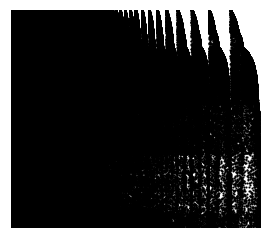

In [15]:
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(m.col, m.row, 's', color='black', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax
    

shape = (100000, 100000)
rows = np.int_(np.round_(shape[0]*np.random.random(1000)))
cols = np.int_(np.round_(shape[1]*np.random.random(1000)))
vals = np.ones_like(rows)

ax = plot_coo_matrix(A)